# Exercise 1: Visualization vs stats

In [25]:
import numpy as np
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt

Means
0) x: 9.00, y: 7.50
1) x: 9.00, y: 7.50
2) x: 9.00, y: 7.50
3) x: 9.00, y: 7.50

Variances
0) x: 10.00, y: 3.75
1) x: 10.00, y: 3.75
2) x: 10.00, y: 3.75
3) x: 10.00, y: 3.75

Pearson correlation coefficients
0) 0.82
1) 0.82
2) 0.82
3) 0.82

Linear regression f(x) = ax+b
0) a: 0.50, b: 3.00
1) a: 0.50, b: 3.00
2) a: 0.50, b: 3.00
3) a: 0.50, b: 3.00


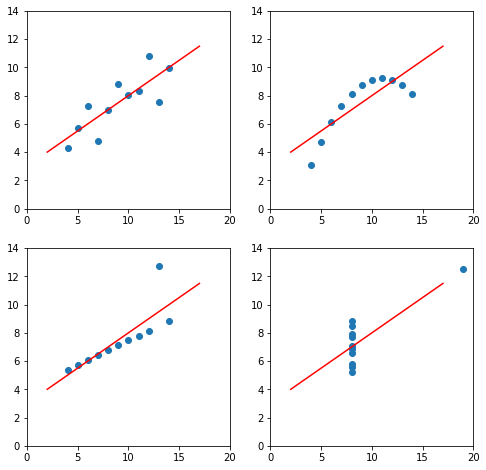

In [26]:
# load data
paths = ['Data1.tsv', 'Data2.tsv', 'Data3.tsv', 'Data4.tsv']
datas = [np.loadtxt(path, delimiter='\t') for path in paths]

# Calculate means of x and y values for each dataset
means = [np.mean(data, axis=0) for data in datas]
print("Means")
[print('{}) x: {:.2f}, y: {:.2f}'.format(i, *mean)) for i, mean in enumerate(means)]

# Calculate variances of x and y values for each dataset
vars = [np.var(data, axis=0) for data in datas]
print("\nVariances")
[print('{}) x: {:.2f}, y: {:.2f}'.format(i, *var)) for i, var in enumerate(vars)]

# Calculate Pearson correlation coefficients for each dataset
corrs = [pearsonr(data[:, 0], data[:, 1]) for data in datas]
print("\nPearson correlation coefficients")
[print('{}) {:.2f}'.format(i, corr[0])) for i, corr in enumerate(corrs)]

# Calculate linear regression coefficients for each dataset
data = datas[0]
regress = [linregress(data[:, 0], data[:, 1]) for data in datas]
print("\nLinear regression f(x) = ax+b")
[print('{}) a: {:.2f}, b: {:.2f}'.format(i, reg.slope, reg.intercept)) for i, reg in enumerate(regress)]


# set up the 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
X = np.linspace(2, 17, 100)

# plot each dataset and its linear fit
for i, ax in enumerate(axs.flatten()):
    data = datas[i]
    x, y = data[:, 0], data[:, 1]

    # fit a straight line through the data¨
    slope, intercept = regress[i].slope, regress[i].intercept

    # plot the data and the linear fit on the appropriate subplot
    ax.plot(x, y, 'o', label='Data')
    ax.plot(X, slope*X + intercept, 'r')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)

plt.show()


## The point
Representations matter! Using general statistics to make broad properties of data can be usefull, but sometime the data can trick us. In this exercise 4 completely different distributed data produces identical statistics. Using visualizations we can easily see there are some some outlier issues along with fitting with the incorrect model. 

# Exercise 2: Paper citations

In [27]:
## Exercise 2: Paper citations
# HELP ME KRISTOFFER

# Exercise 3: Law of large numbers
## Normal distribution

In [85]:
def analyze_sample(Y):  # Get all relevant statistics (don't plot here)
    n = len(Y)
  
    # 3-4) Cumulative average and standard error

    cum_avg = [np.mean(Y[:i]) for i in range(1, n+1)]
    cum_SE = [np.std(Y[:i]) / np.sqrt(i) for i in range(1, n+1)]

    # 5) mean and median
    mean, median = np.mean(Y), np.median(Y)
    print("Mean: {:.2f}, Median: {:.2f}".format(mean, median))
    
    # 7) Cumulative median
    cum_med = [np.median(Y[:i]) for i in range(1, n+1)]

    return cum_avg, cum_SE, cum_med, mean, median




In [74]:
X = np.arange(0, 1001, 100)
print(X[0], X[-1])
print(X)


0 1000
[   0  100  200  300  400  500  600  700  800  900 1000]


Mean: -0.04, Median: -0.05


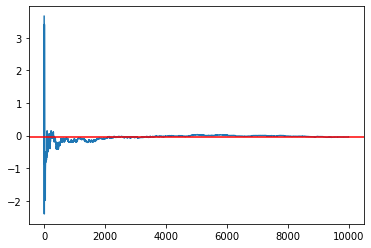

In [82]:
np.random.seed(69)

# 1) Gaussian sampling
n = 10_000
mu, sigma = 0, 4
Y = np.random.standard_normal(n) * sigma + mu

# 2) Plot distribution
# plt.hist(Y, bins=100, density=True)
# plt.title('Gaussian distribution')
# plt.show()

cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)
# X = np.arange(0, n)
# plt.plot(X, cum_avg, label='Cumulative average')

# X = np.arange(1, n+1, 1_000)

# cum_avg = [cum_avg[x] for x in X]
# cum_SE = [cum_SE[x] for x in X]
# plt.errorbar(X, cum_avg, yerr=cum_SE, fmt='o', capsize=3)
# plt.axhline(mean, color='r', label='Mean')
# plt.show()

# 7) Cumulative median
cum_med = [np.median(Y[:i]) for i in range(1, n+1)]

# 8) Plot stuff
X = np.arange(0, n)
plt.plot(X, cum_med, label='Cumulative median')
plt.axhline(median, color='r', label='Mean')
plt.show()


## Pareto distribution

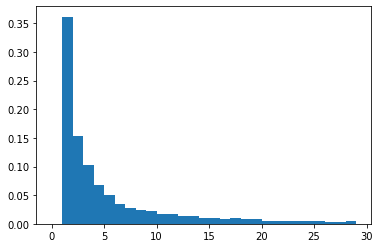

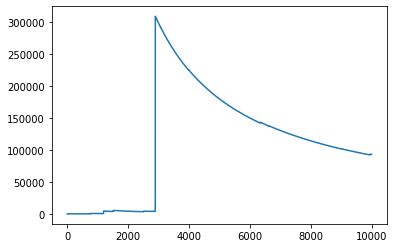

In [87]:
np.random.seed(69)

# 9) Pareto sampling
x_m = 1 # scale x_m/m parameter
alpha = 0.5 # shape alpha/a parameter
Y = (np.random.pareto(alpha, n) + 1) * x_m

# 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.show()

# cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)
plt.plot(X, cum_avg, label='Cumulative average')  # LEARNING MOMENT max(cum_avg) return 300000, which afterwards drops towards zero


In [90]:
cum_avg.find(max(cum_avg))

2896

## Lognormal Distribution

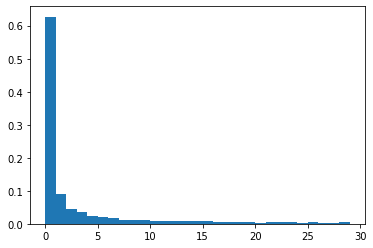

Mean: 1363.87, Median: 0.96


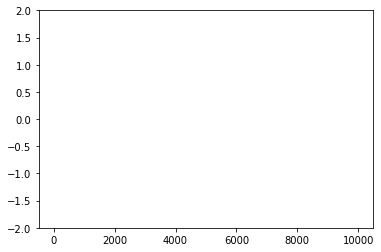

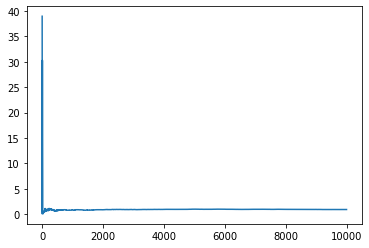

In [53]:
np.random.seed(69)

# 11) Pareto sampling by inverse transform sampling of uniform distribution
mu = 0 
sigma = 4 
Y = np.exp(np.random.standard_normal(n) * sigma + mu)

# 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.show()

# Inverse transform sampling
analyze_sample(Y)

## Citations from 2019

In [94]:
import pickle, pandas as pd
data = pd.read_pickle(r'C:\Users\Jason\Downloads\paperDataSet.pkl')


In [97]:
data.columns
Y = np.array(data['papersCitationCount'])

34.62355033802124 4.0


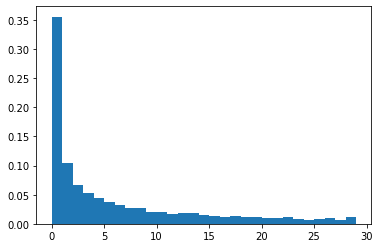

In [101]:
mean, median = np.mean(Y), np.median(Y)
print(mean, median)

# Sample 10_000 papers
Y = np.random.choice(Y, 10_000)

# cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)

# # 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.show()


Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
- Normal central limit theorem, Pareto has crazy outliers, 

Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?
- In general median is more robust to outliers. Thus, median is most usefull in heavy tailed distributions. 
Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications?

What do you think are the main take-home message of this exercise?
- Papers citations are apparently heavy tailed. Heavy tailed distributions are not well represented by the mean, and thus median is more usefull. 

# ChatGPT

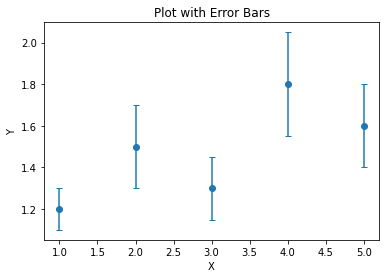

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.5, 1.3, 1.8, 1.6])
yerr = np.array([0.1, 0.2, 0.15, 0.25, 0.2])  # error bars

# Plot the data with error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=3)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with Error Bars')

# Show the plot
plt.show()
